In [28]:
import time
import copy
import numpy as np
from skimage.filters import gaussian_filter

import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 15)

from tifffile import imread, imsave
import cPickle as pickle

%reload_ext autoreload
%autoreload 2

from netsurface2d import NetSurf2d
from data3d import Data3d

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Load time-lapse data...

In [48]:
filename = '/Users/jug/Repositories/GIT/BobSeg/TestLapseData2d_151119-nmy2GFP-tagRfpPH-wt-04_w1LMM_488+488_LP_myTestCrop_bgrem.tif'
#filename = '/Users/jug/Repositories/GIT/BobSeg/TestLapseData2d_151119-nmy2GFP-tagRfpPH-wt-04_w1LMM_488+488_LP_myTestCrop.tif'

stack = imread(filename)
print 'Stack shape:',stack.shape

segchannel = stack[:,1,:,:]
sigma = [0.,2.,2.]
segchannel_smooth = gaussian_filter(segchannel,sigma)

print 'Segchannel shape:',segchannel.shape
print 'Single image:',segchannel[0].shape

Stack shape: (20, 2, 368, 337)
Segchannel shape: (20, 368, 337)
Single image: (368, 337)


In [61]:
max_rs = (segchannel[0].shape[1] / 3,
          segchannel[0].shape[0] / 3)

min_rs = (5,5)
print min_rs, max_rs

(5, 5) (112, 122)


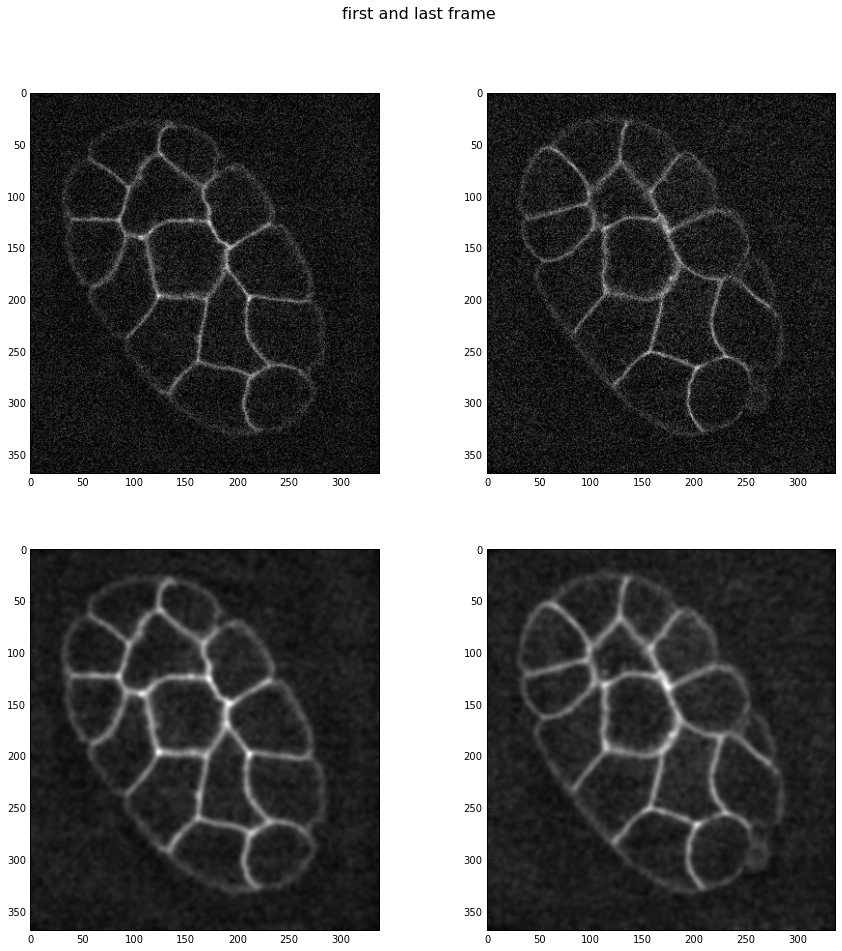

In [62]:
fig = plt.figure()
fig.suptitle('first and last frame', fontsize=16)
ax = fig.add_subplot(221)
ax.imshow(segchannel[0], plt.get_cmap('gray'))
ax = fig.add_subplot(222)
ax.imshow(segchannel[-1], plt.get_cmap('gray'))
ax = fig.add_subplot(223)
ax.imshow(segchannel_smooth[0], plt.get_cmap('gray'))
ax = fig.add_subplot(224)
ax.imshow(segchannel_smooth[-1], plt.get_cmap('gray'))

In [63]:
data = Data3d( segchannel_smooth, pixelsize=(1.,1.), silent=False )
data.set_seg_params(num_columns=50,K=100,max_delta_k=8)
objects = []

## adding E cells

In [64]:
Ea = data.init_object("Ea")
objects.append(Ea)

Ep = data.init_object("Ep")
objects.append(Ep)

In [65]:
data.add_object_at( Ea, min_rs, max_rs, frame=0, seed=(150,160), segment_it=True )
data.track(Ea, seed_frame=0, target_frames=range(1,len(data.images)), recenter_iterations=1)

Added appearance for "Ea" in frame 0 with seed coordinates [ 150.  160.]
      Optimum energy:  0.0573666154767
      Nodes in/out:  1550 3450
Added appearance for "Ea" in frame 1 with seed coordinates [ 150.  160.]
      Optimum energy:  0.0565343462193
      Nodes in/out:  1565 3435
    Updated center to [149 160]
Added appearance for "Ea" in frame 2 with seed coordinates [ 149.  160.]
      Optimum energy:  0.059555254329
      Nodes in/out:  1562 3438
    Updated center to [149 160]
Added appearance for "Ea" in frame 3 with seed coordinates [ 149.  160.]
      Optimum energy:  0.0584820927836
      Nodes in/out:  1619 3381
    Updated center to [148 160]
Added appearance for "Ea" in frame 4 with seed coordinates [ 148.  160.]
      Optimum energy:  0.058345499443
      Nodes in/out:  1621 3379
    Updated center to [148 160]
Added appearance for "Ea" in frame 5 with seed coordinates [ 148.  160.]
      Optimum energy:  0.0581336922708
      Nodes in/out:  1596 3404
    Updated cent

In [66]:
data.add_object_at( Ep, min_rs, max_rs, frame=0, seed=(130,100), segment_it=True )
data.track(Ep, seed_frame=0, target_frames=range(1,len(data.images)), recenter_iterations=1)

Added appearance for "Ep" in frame 0 with seed coordinates [ 130.  100.]
      Optimum energy:  0.0513572037337
      Nodes in/out:  1417 3583
Added appearance for "Ep" in frame 1 with seed coordinates [ 130.  100.]
      Optimum energy:  0.0503957739092
      Nodes in/out:  1405 3595
    Updated center to [127 100]
Added appearance for "Ep" in frame 2 with seed coordinates [ 127.  100.]
      Optimum energy:  0.0509422906861
      Nodes in/out:  1383 3617
    Updated center to [126 101]
Added appearance for "Ep" in frame 3 with seed coordinates [ 126.  101.]
      Optimum energy:  0.0511435642577
      Nodes in/out:  1379 3621
    Updated center to [125 101]
Added appearance for "Ep" in frame 4 with seed coordinates [ 125.  101.]
      Optimum energy:  0.0520420566808
      Nodes in/out:  1374 3626
    Updated center to [124 101]
Added appearance for "Ep" in frame 5 with seed coordinates [ 124.  101.]
      Optimum energy:  0.0511630302751
      Nodes in/out:  1355 3645
    Updated ce

# Save / Load 

In [46]:
data.save('/Users/jug/Repositories/GIT/BobSeg/TestLapseData2d.pkl')

In [41]:
data = Data3d( segchannel, silent=False )
data.load('/Users/jug/Repositories/GIT/BobSeg/TestLapseData2d.pkl')
objects = range(len(data.object_names))

Working on "Ea" (object 1 of 2 )...
   Segmenting in frame 0...
center None


TypeError: object of type 'NoneType' has no len()

# Visualisation stuff 

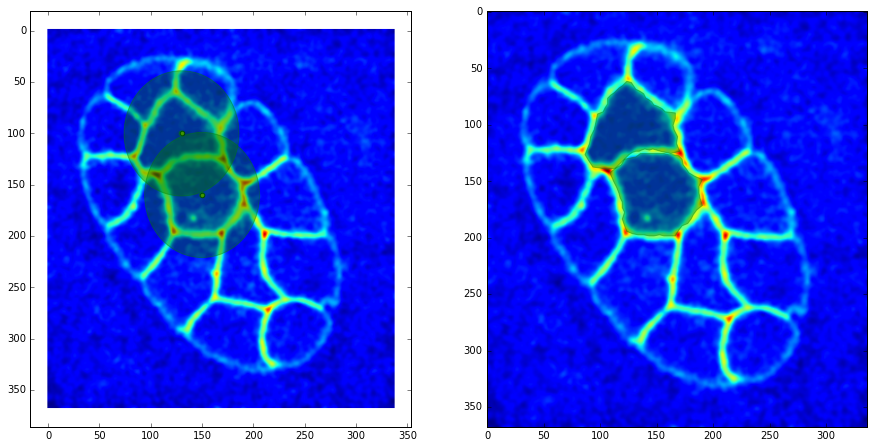

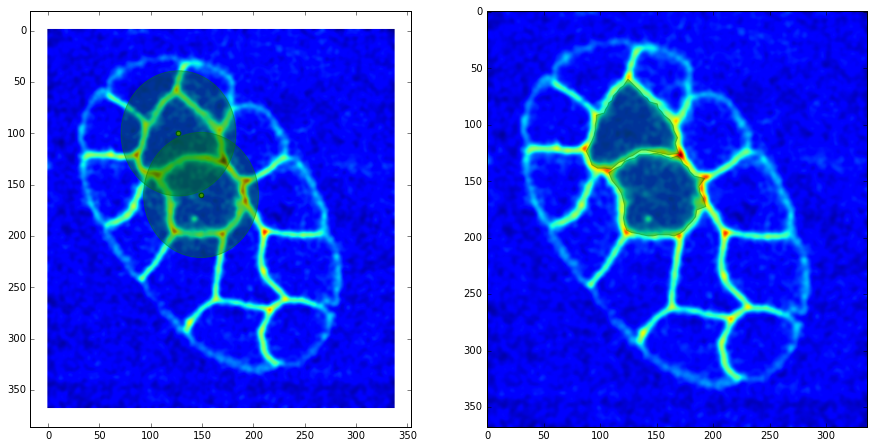

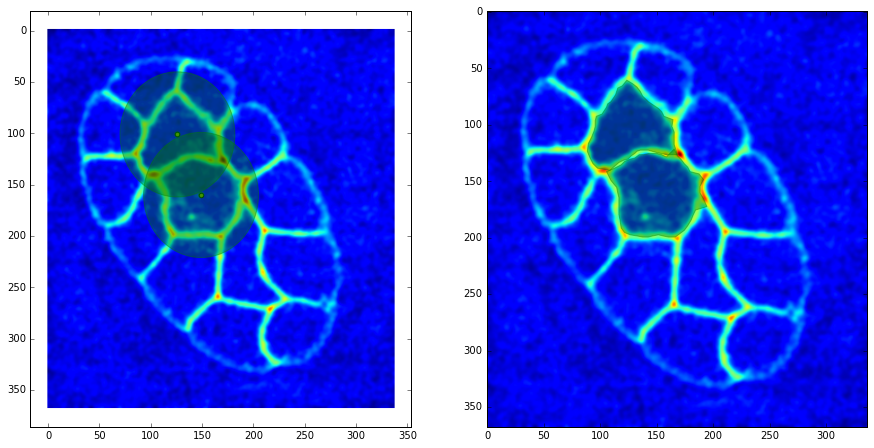

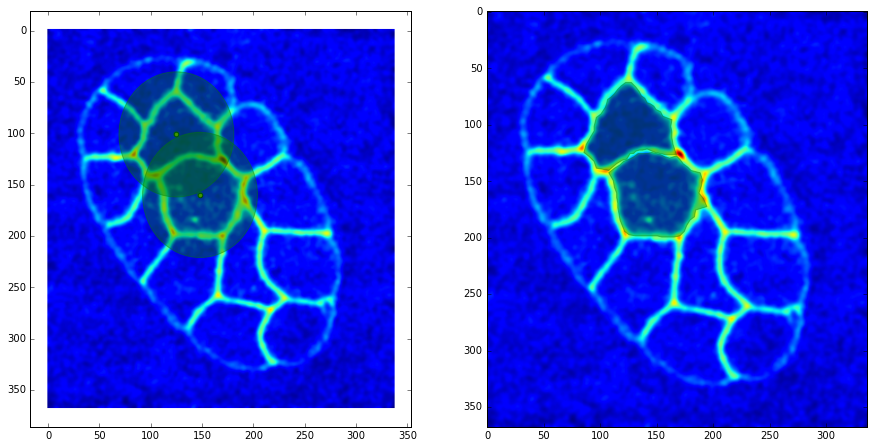

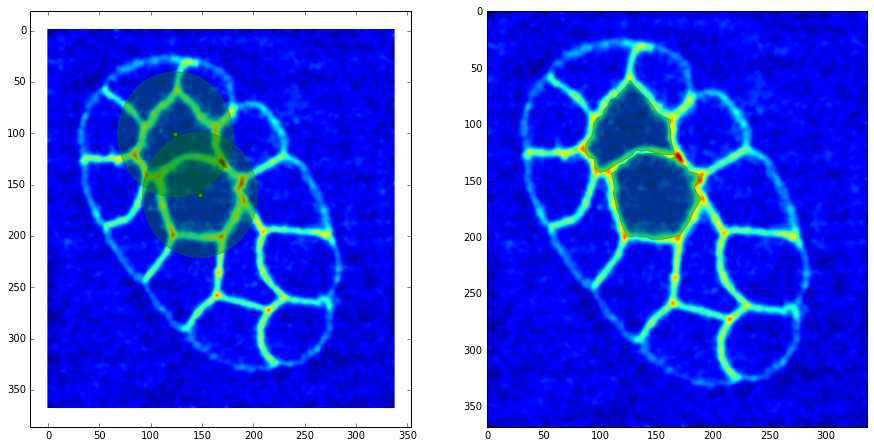

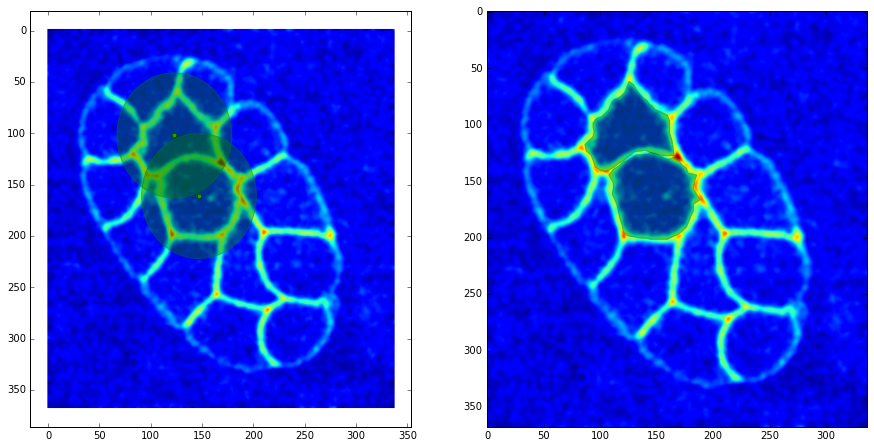

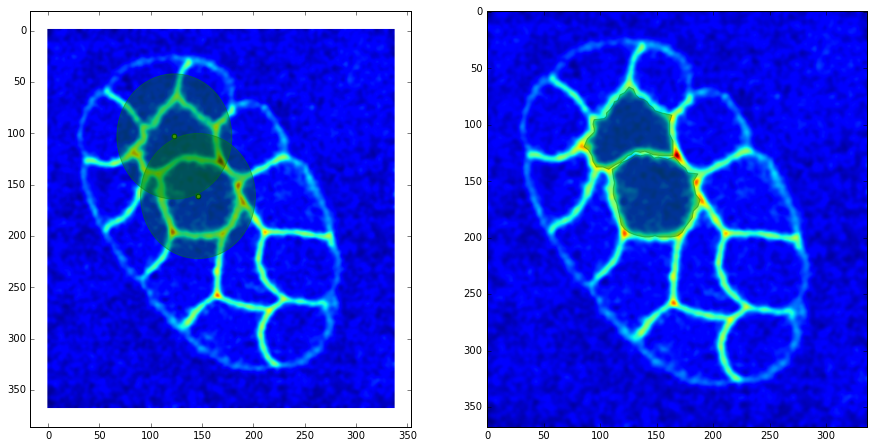

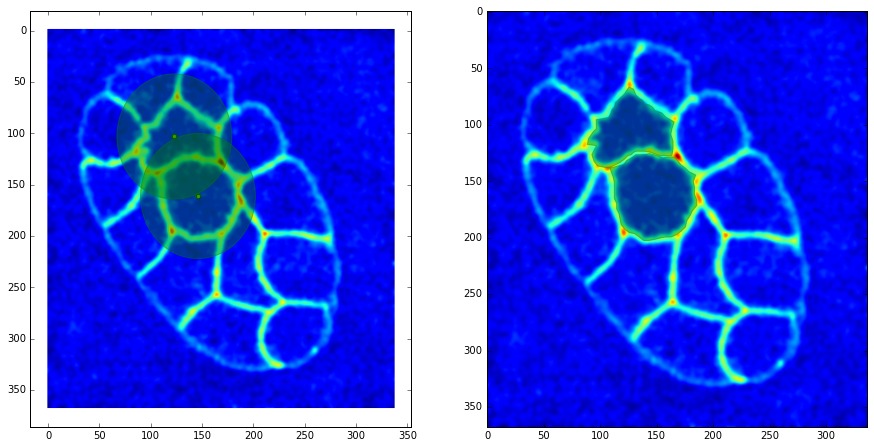

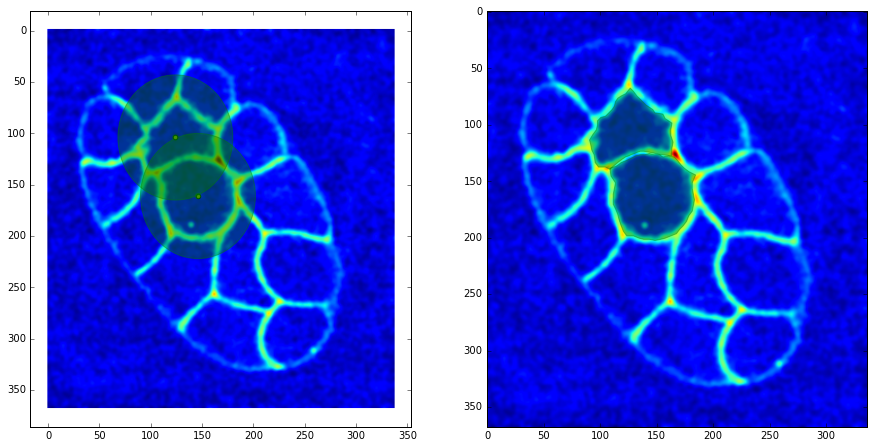

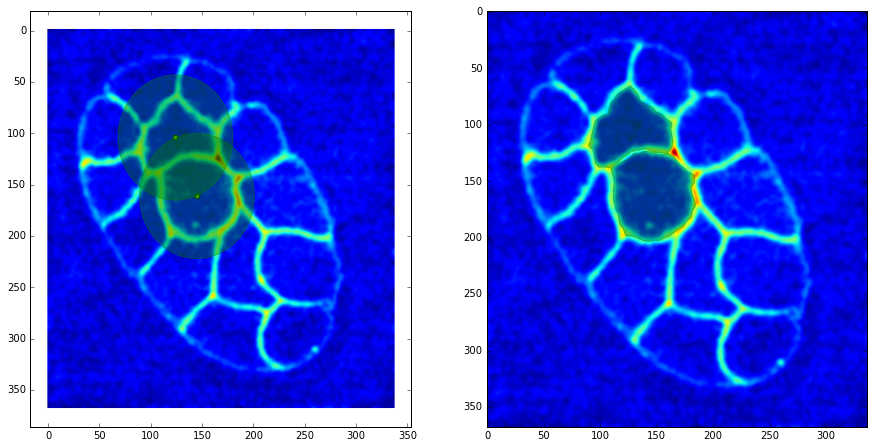

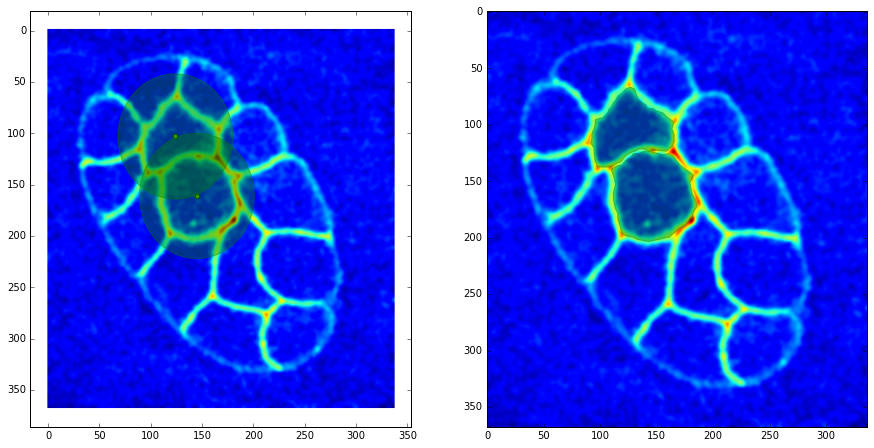

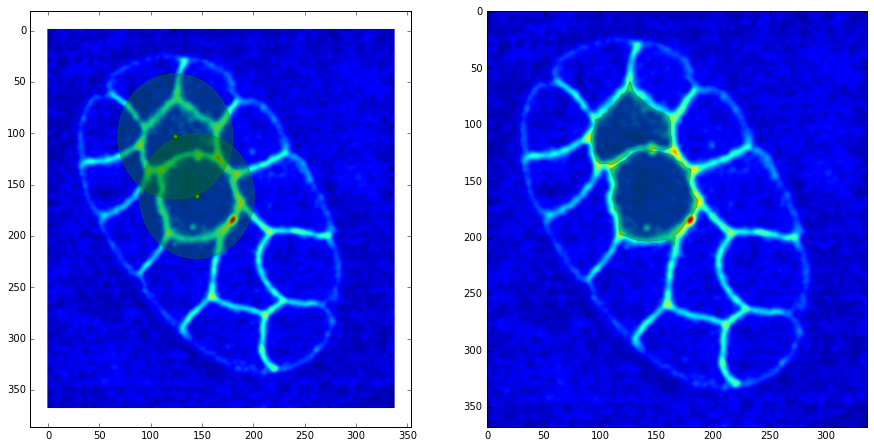

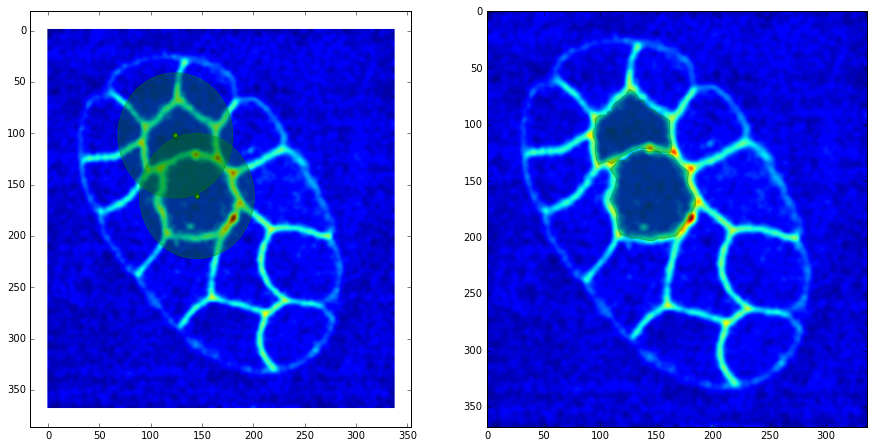

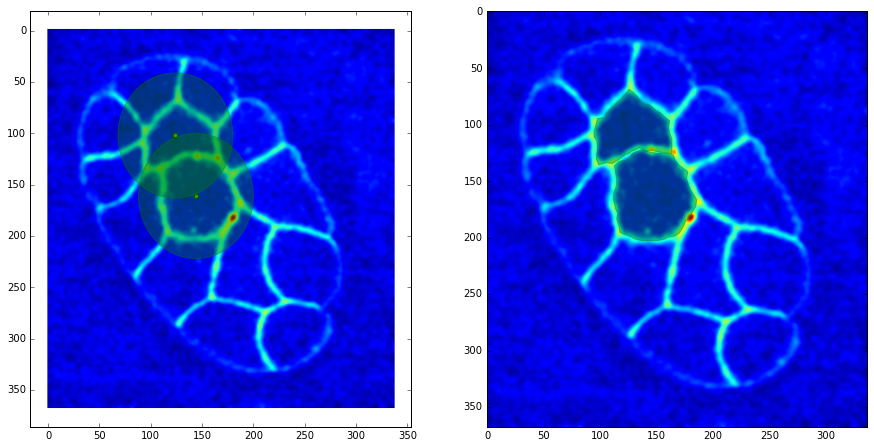

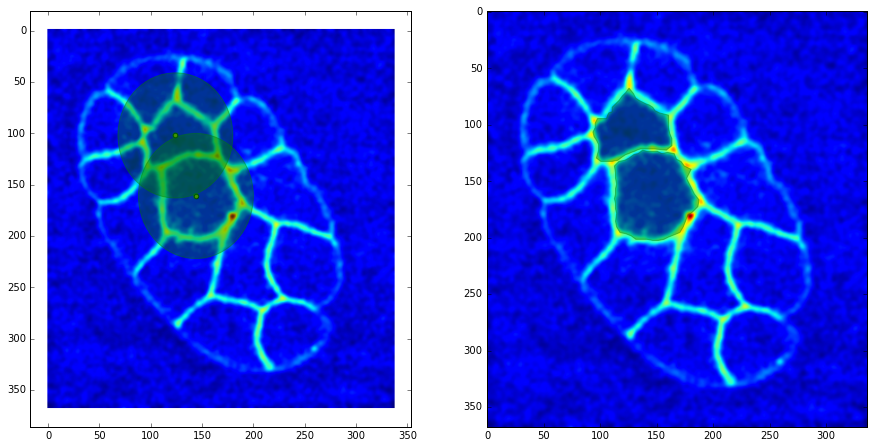

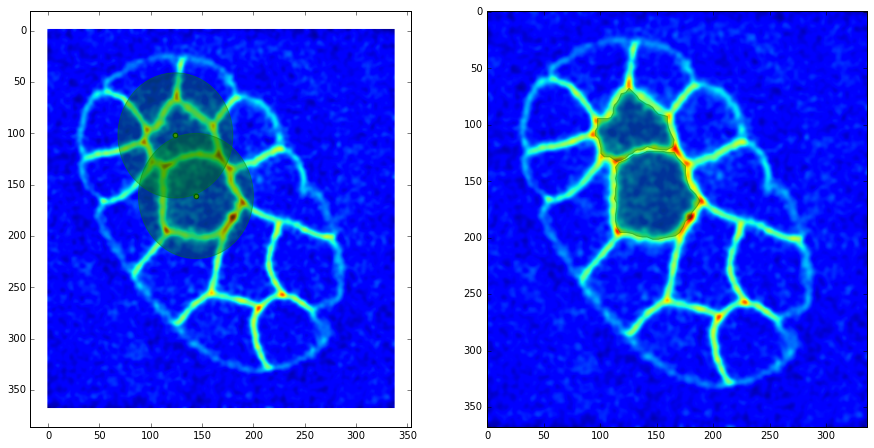

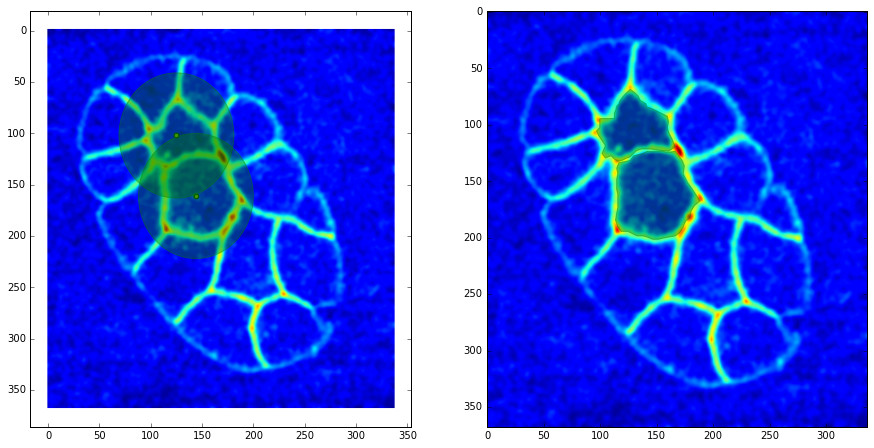

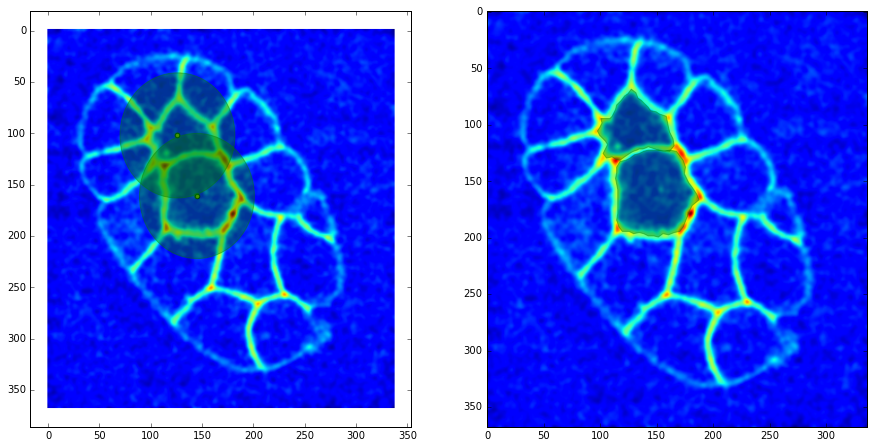

In [67]:
for frame in range(1,19):
    fig = plt.figure()
    ax = plt.subplot(121)
    data.plot_minmax( frame, ax )
    ax = plt.subplot(122)
    data.plot_result( frame, ax )

## 